In [1]:
%pylab notebook
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

In [3]:
!ls data/manuvers_raw/

mov1.avi  mov2.avi  mov3.avi  mov4.avi	mov%s.avi
mov1.pkl  mov2.pkl  mov3.pkl  mov4.pkl	mov%s.pkl


In [4]:
import pickle
data=[]
fd=open('data/manuvers_raw/mov3.pkl','rb')
while 1:
    try:
        data.append(pickle.load(fd))
    except EOFError:
        break

In [5]:
data[600]

{'c_sync': 16.806970357894897}

In [6]:
def smaple_reader():
    for d in data:
        yield d
sr=smaple_reader()


In [7]:
calib_samples=[sr.__next__() for _ in range(100)]

In [8]:
acc_mat=np.array([a['a/g'][:3] for a in calib_samples if 'a/g' in a])
alt_mat=np.array([a['alt'] for a in calib_samples if 'alt' in a])

<IPython.core.display.Javascript object>


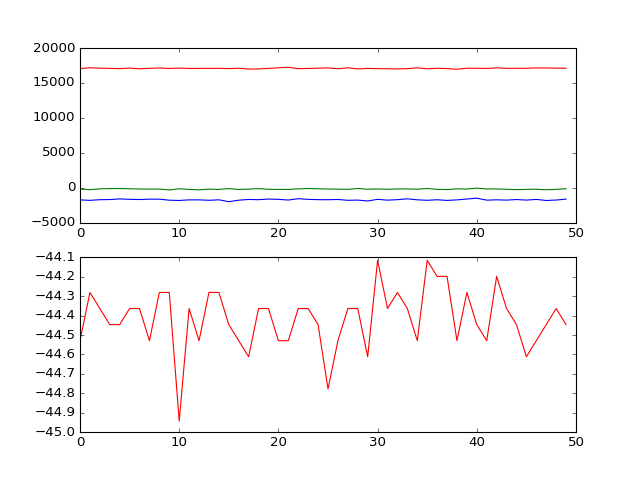

[ 17084.48   -208.48  -1736.08]
[ 0.99480329 -0.01213947 -0.1010893 ]


In [9]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(acc_mat[:,0],'r')
plt.plot(acc_mat[:,1],'g')
plt.plot(acc_mat[:,2],'b')
#g_mean=acc_mat[:,2].mean()
#g_mean=np.sqrt((acc_mat[:,:3]**2).sum(axis=1))#.mean()
g_mean=acc_mat[:,:3].mean(axis=0)

g_unit=g_mean/np.sqrt((g_mean**2).sum())

g_scale=np.sqrt((g_mean**2).sum())
print(g_mean)
plt.subplot(2,1,2)
plt.plot(alt_mat,'r')
alt_var=alt_mat.var()
print(g_unit)

In [10]:
def get_scaled_g_alt(d):
    #return (np.sqrt((d['a/g'][:3]**2).sum())/g_mean-1)*9.8,d['alt']    
    #return np.sqrt((d['a/g'][:3]**2).sum(axis=0)),d['alt']
    return (d['a/g'][:3]*g_unit).sum()/g_scale-1.0,d['alt']
    #return d['a/g'][2],d['alt']




In [11]:
###kalman
def kalman(start_alt):
    Xk=np.array([0,0,start_alt]) #acc vel pos
    def F(X,dt):
        pass

In [12]:
az_scale=[]
alt_vec=[]
t_stemp=[]
t_stemp_internal=[]
while 1:
    try:
        next_data=sr.__next__()
        if 'alt' in next_data:
            az,alt=get_scaled_g_alt(next_data)
            az_scale.append(az)
            alt_vec.append(alt)
            t_stemp.append(next_data['s_sync'])
            t_stemp_internal.append(next_data['t_stemp_ms'])
    except StopIteration:
        break
t_stemp=np.array(t_stemp)
t_stemp-=t_stemp[0]
t_stemp_internal=np.array(t_stemp_internal)
t_stemp_internal-=t_stemp_internal[0]
t_stemp_internal=t_stemp_internal


<IPython.core.display.Javascript object>


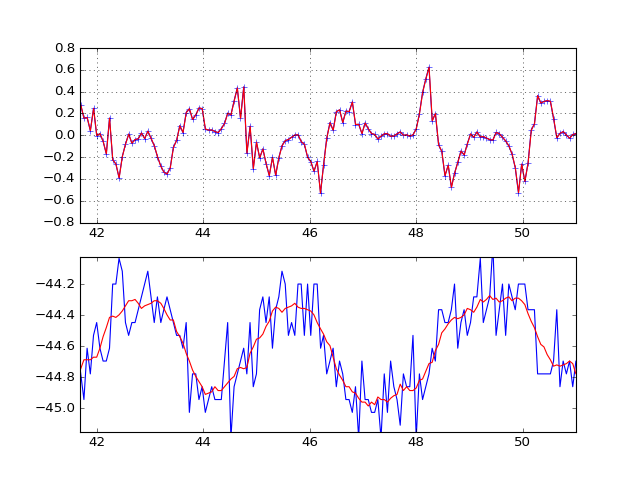

/local/ori/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [15]:
#print(az_scale)
plt.figure()
ax=plt.subplot(2,1,1)
plt.grid('on')
plt.plot(t_stemp,az_scale,'-+b')
plt.plot(t_stemp_internal,az_scale,'-r')
plt.subplot(2,1,2,sharex=ax)
plt.plot(t_stemp,alt_vec)
fsize=10
plt.plot(t_stemp[fsize/2:-fsize/2+1],np.convolve(np.ones(fsize)/fsize,alt_vec,'valid'),'-r')


<IPython.core.display.Javascript object>


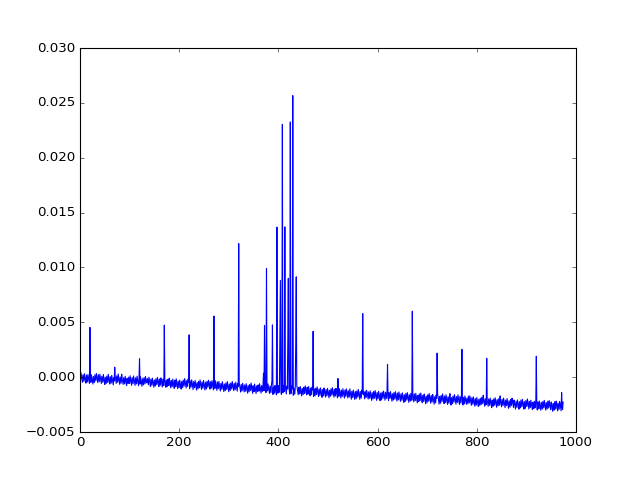

In [14]:
plt.figure()
plot(t_stemp-t_stemp_internal,'-')